In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
print(X.shape)

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 4)


(150, 2)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar un dataset de ejemplo
np.random.seed(42)
data = {
    'Edad': np.random.randint(18, 70, 100),
    'Ingreso': np.random.randint(15000, 80000, 100),
    'Categoría': np.random.choice(['A', 'B', 'C'], 100),
    'Gasto Mensual': np.random.randint(1000, 5000, 100),
    'Etiqueta': np.random.choice([0, 1], 100)
}

# Crear el DataFrame
df = pd.DataFrame(data)

In [38]:
# Introducir valores faltantes y outliers (ruido)
df.loc[5:10, 'Ingreso'] = np.nan  # Introducir valores faltantes en la columna 'Ingreso'
df.loc[20, 'Gasto Mensual'] = 99999  # Introducir un outlier en la columna 'Gasto Mensual'

# Mostrar los datos originales
print("Datos originales con valores faltantes y outliers:")
print(df.head(30))

Datos originales con valores faltantes y outliers:
    Edad  Ingreso Categoría  Gasto Mensual  Etiqueta
0     56  76228.0         B           4643         1
1     69  64216.0         B           1880         1
2     46  63984.0         C           3049         1
3     32  55774.0         B           3944         0
4     60  17568.0         C           2327         1
5     25      NaN         A           3301         0
6     38      NaN         C           4723         1
7     56      NaN         B           1452         0
8     36      NaN         A           4108         1
9     40      NaN         A           2183         0
10    28      NaN         A           4062         0
11    28  20258.0         C           3056         1
12    41  37002.0         B           4304         0
13    53  54504.0         A           4170         0
14    57  48159.0         A           2682         1
15    41  28986.0         A           3863         0
16    20  76858.0         C           3255      

In [39]:
# Función para detectar valores faltantes
def detectar_valores_faltantes(df):
    print("\nValores faltantes por columna:")
    print(df.isnull().sum())


In [40]:
# Ejecutar las funciones de preprocesamiento
detectar_valores_faltantes(df)


Valores faltantes por columna:
Edad             0
Ingreso          6
Categoría        0
Gasto Mensual    0
Etiqueta         0
dtype: int64


In [41]:
# Imputar valores faltantes con 0
df1 = df.copy()
df1['Ingreso'] = df1['Ingreso'].fillna(0)

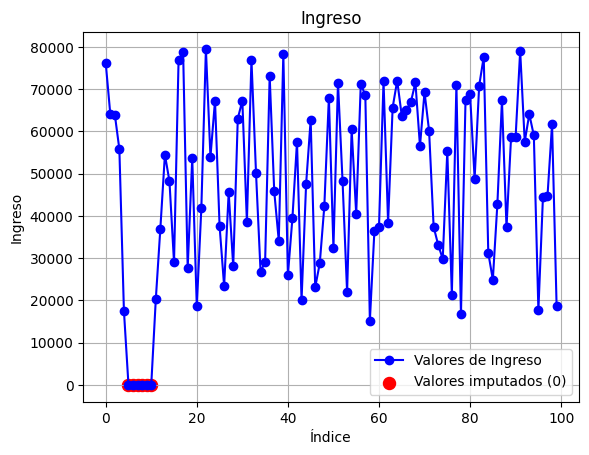

In [42]:
# Importar la librería necesaria si no está importada
import matplotlib.pyplot as plt

# Plot all 'Ingreso' values as a single line
plt.plot(df1['Ingreso'], marker='o', linestyle='-', color='blue', label='Valores de Ingreso')

# Highlight imputed values (0) with a different marker color
imputed_indices = df1[df1['Ingreso'] == 0].index
plt.scatter(imputed_indices, df1.loc[imputed_indices, 'Ingreso'], color='red', label='Valores imputados (0)', s=75) # Use scatter for better visibility

plt.title('Ingreso')
plt.xlabel('Índice')
plt.ylabel('Ingreso')
plt.grid(True)
plt.legend()
plt.show()


In [43]:
# Función para rellenar valores faltantes con la media de la columna
def rellenar_valores_faltantes(df):
    df["Ingreso"] = df["Ingreso"].fillna(df['Ingreso'].median())
    print("\nValores faltantes en la columna 'Ingreso' han sido rellenados con la media.")
    return df

In [44]:
df = rellenar_valores_faltantes(df)


Valores faltantes en la columna 'Ingreso' han sido rellenados con la media.


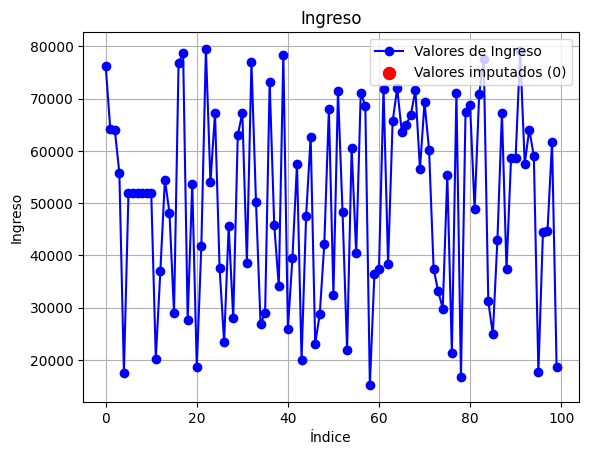

In [45]:
# Importar la librería necesaria si no está importada
import matplotlib.pyplot as plt

# Plot all 'Ingreso' values as a single line
plt.plot(df['Ingreso'], marker='o', linestyle='-', color='blue', label='Valores de Ingreso')

# Highlight imputed values (0) with a different marker color
imputed_indices = df[df['Ingreso'] == 0].index
plt.scatter(imputed_indices, df.loc[imputed_indices, 'Ingreso'], color='red', label='Valores imputados (0)', s=75) # Use scatter for better visibility

plt.title('Ingreso')
plt.xlabel('Índice')
plt.ylabel('Ingreso')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
# Función para detectar outliers simples
def detectar_outliers(df, columna, umbral):
    outliers = df[df[columna] > umbral]
    print(f"\nOutliers detectados en la columna '{columna}' con un umbral de {umbral}:")
    print(outliers)


In [47]:
detectar_outliers(df, 'Gasto Mensual', 5000)


Outliers detectados en la columna 'Gasto Mensual' con un umbral de 5000:
    Edad  Ingreso Categoría  Gasto Mensual  Etiqueta
20    61  18561.0         A          99999         1


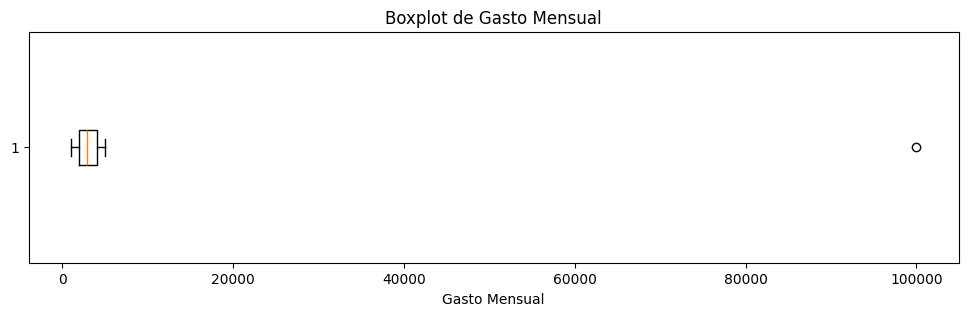

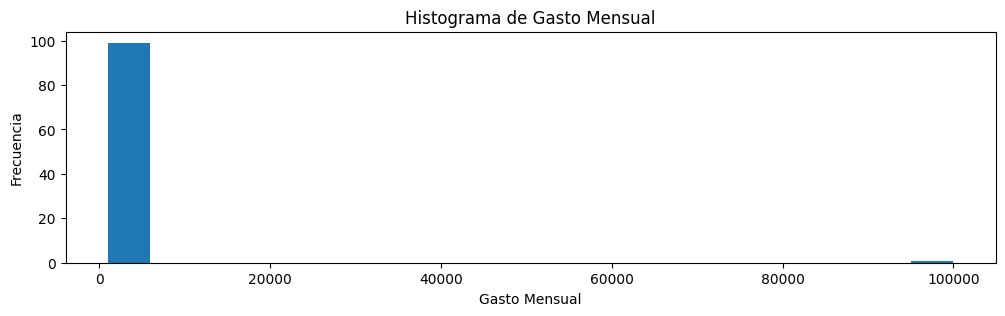

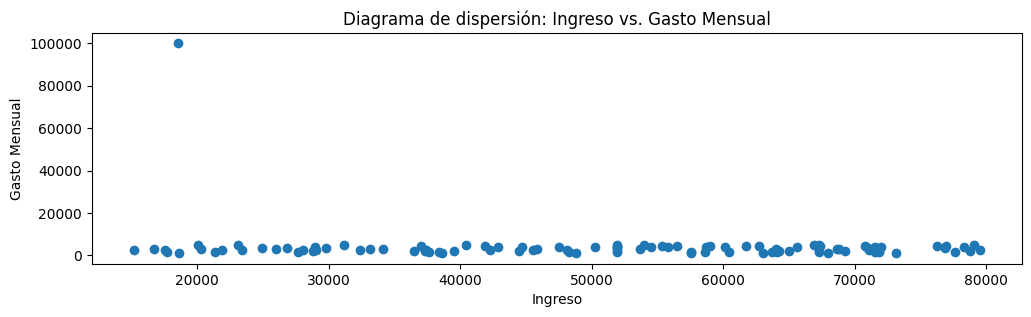

In [52]:
# prompt: hasme un grafico de plot para ver el Outlier

import matplotlib.pyplot as plt

# Boxplot para visualizar outliers en 'Gasto Mensual'
plt.figure(figsize=(12, 3))
plt.boxplot(df['Gasto Mensual'], vert=False)
plt.title('Boxplot de Gasto Mensual')
plt.xlabel('Gasto Mensual')
plt.show()

# Histograma para visualizar la distribución de 'Gasto Mensual'
plt.figure(figsize=(12, 3))
plt.hist(df['Gasto Mensual'], bins=20)
plt.title('Histograma de Gasto Mensual')
plt.xlabel('Gasto Mensual')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de dispersión para 'Gasto Mensual' vs. 'Ingreso'
plt.figure(figsize=(12, 3))
plt.scatter(df['Ingreso'], df['Gasto Mensual'])
plt.title('Diagrama de dispersión: Ingreso vs. Gasto Mensual')
plt.xlabel('Ingreso')
plt.ylabel('Gasto Mensual')
plt.show()


Ingreso límite inferior: 16663.28 Ingreso límite superior: 79048.61
Gasto Mensual límite inferior: 1097.18 Gasto Mensual límite superior: 5941.080000000486

Datos originales: 100 instancias
Datos después de eliminar outliers: 96 instancias


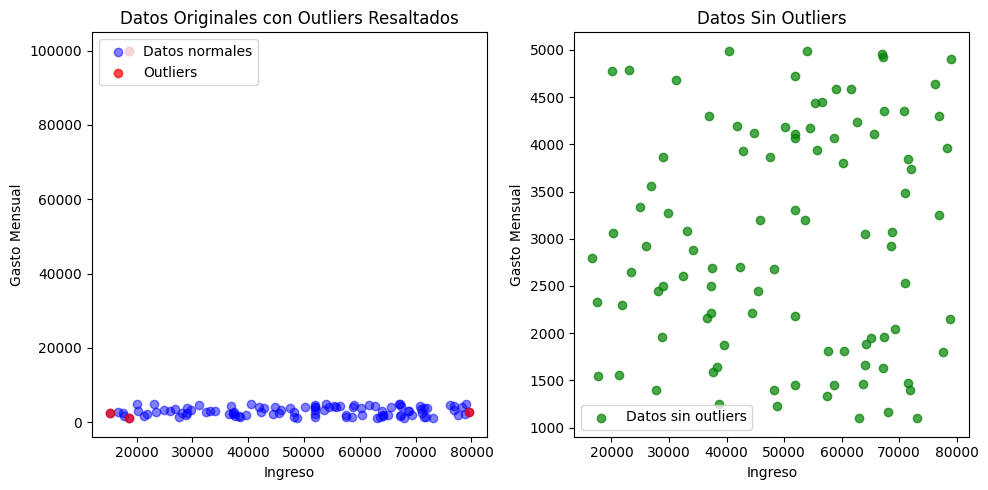

In [60]:
# Detectar valores atípicos utilizando percentiles (por ejemplo, 1% y 99%)
ingreso_limite_inferior = df['Ingreso'].quantile(0.01)
ingreso_limite_superior = df['Ingreso'].quantile(0.99)

gasto_limite_inferior = df['Gasto Mensual'].quantile(0.01)
gasto_limite_superior = df['Gasto Mensual'].quantile(0.99)

print(f"Ingreso límite inferior: {ingreso_limite_inferior} Ingreso límite superior: {ingreso_limite_superior}")
print(f"Gasto Mensual límite inferior: {gasto_limite_inferior} Gasto Mensual límite superior: {gasto_limite_superior}")

# Filtrar los datos que están fuera de estos límites
outliers = df[(df['Ingreso'] < ingreso_limite_inferior) | (df['Ingreso'] > ingreso_limite_superior) |
              (df['Gasto Mensual'] < gasto_limite_inferior) | (df['Gasto Mensual'] > gasto_limite_superior)]

df_filtrado = df[(df['Ingreso'] > ingreso_limite_inferior) & (df['Ingreso'] < ingreso_limite_superior) &
                 (df['Gasto Mensual'] > gasto_limite_inferior) & (df['Gasto Mensual'] < gasto_limite_superior)]

print(f"\nDatos originales: {len(df)} instancias")
print(f"Datos después de eliminar outliers: {len(df_filtrado)} instancias")

# Visualización de los datos originales con outliers resaltados

plt.figure(figsize=(10, 5))

# Gráfico 1: Datos originales con outliers resaltados
plt.subplot(1, 2, 1)
plt.scatter(df['Ingreso'], df['Gasto Mensual'], color='blue', alpha=0.5, label='Datos normales')
plt.scatter(outliers['Ingreso'], outliers['Gasto Mensual'], color='red', alpha=0.7, label='Outliers')
plt.title('Datos Originales con Outliers Resaltados')
plt.xlabel('Ingreso')
plt.ylabel('Gasto Mensual')
plt.legend()
plt.legend(loc='upper left')  # Ejemplo de posición en la esquina superior izquier

# Gráfico 2: Datos filtrados sin outliers
plt.subplot(1, 2, 2)
plt.scatter(df_filtrado['Ingreso'], df_filtrado['Gasto Mensual'], color='green', alpha=0.7, label='Datos sin outliers')
plt.title('Datos Sin Outliers')
plt.xlabel('Ingreso')
plt.ylabel('Gasto Mensual')
plt.legend()

plt.tight_layout()
plt.show()